# MODULES


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets

sns.set()


___

# NORMAL DISTRIBUTION

Many real-life variables roughly follow the Gaussian or **Normal Distribution**: height, weight, test scores, etc. This makes this distribution one of the most useful tools in statistics.

The Normal Distribution describes a continuous variable whose PDF is symetrical and has a single peak. It has two parameters:
+ The mean describes where the center of the peak is. 
+ The standard deviation describes how wide the peak is, or how spread out the data are.

Smaller standard deviations mean:
+ the data is less spread out around the mean.
+ the CDF slope is more vertical around the median (which is equal to the mean).

A normal distribution:
+ is centered around its mean
+ has 2/3 of all its values inside +/- 1SD from the mean
+ has 95% of all its values inside +/- 2SD from the mean
+ had 99.5% of all its values inside +/- 3SD from the mean

_Note1: the Standard Normal Distribution has a mean of 0 and and a standard deviation of 1._
_Note2: we can convert a normal distribution to the **standard normal distribution** by using its z-scores: $z = (x - \mu) / \sigma$._


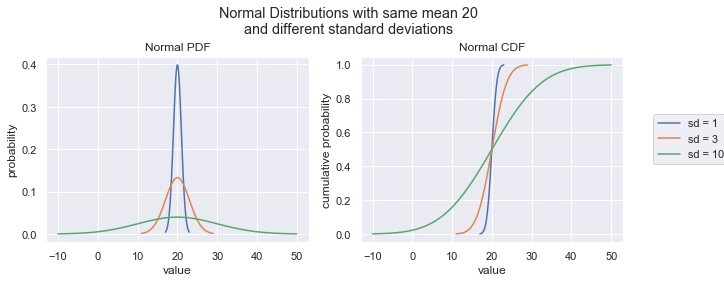

In [96]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for sigma in [1, 3, 10]:

    x = np.linspace(20 - 3*sigma, 20 + 3*sigma, 100)
    _ = ax1.plot(x, stats.norm.pdf(x, 20, sigma))
    _ = ax2.plot(x, stats.norm.cdf(x, 20, sigma))

# labels
_ = ax1.set_xlabel('value')
_ = ax1.set_ylabel('probability')
_ = ax2.set_xlabel('value')
_ = ax2.set_ylabel('cumulative probability')

# titles
_ = ax1.set_title('Normal PDF')
_ = ax2.set_title('Normal CDF')

fig.suptitle('Normal Distributions with same mean 20\nand different standard deviations')

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
_ = fig.legend(('sd = 1', 'sd = 3', 'sd = 10'), loc='right', bbox_to_anchor=(1.02, 0.5))


___

# BINOMIAL DISTRIBUTION

A Bernoulli trial describes any experiment that can either succeed or fail, like the flip of a possibly biased coin. It has one parameter: the probability of success $p$.

A Binomial process is a sequence of $n$ independent Bernoulli trials. The Binomial distribution describes the probability of getting any number of successes in a given Binomial process. It has two parameters:
+ the number of Bernoulli trials $n$.
+ the probability of success for each Bernoulli trial $p$.

It has a mean of $n * p$ and a variance of $n * p * (1 - p)$. 


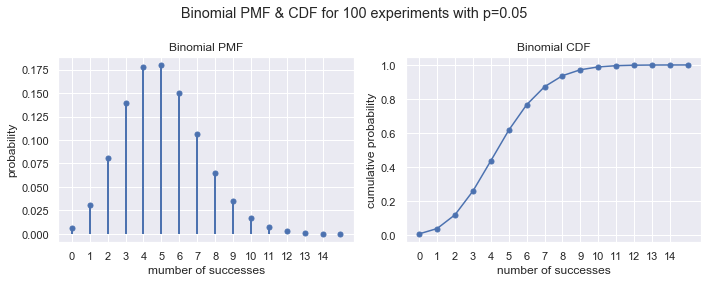

In [120]:
# Plot the PMF and CDF
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

x = np.linspace(0, 15, 16)
_ = ax1.plot(x, stats.binom.pmf(x, 100, 0.05), 'bo', ms=5)
_ = ax1.vlines(x, 0, stats.binom.pmf(x, 100, 0.05), colors='b', lw=2)
_ = ax2.plot(x, stats.binom.cdf(x, 100, 0.05), marker='o', ms=5)

# labels
_ = ax1.set_xlabel('mumber of successes')
_ = ax1.set_ylabel('probability')
_ = ax2.set_xlabel('number of successes')
_ = ax2.set_ylabel('cumulative probability')
_ = ax1.set_xticks(range(0, 15))
_ = ax2.set_xticks(range(0, 15))

# titles
_ = ax1.set_title('Binomial PMF')
_ = ax2.set_title('Binomial CDF')

fig.suptitle('Binomial PMF & CDF for 100 experiments with p=0.05')

plt.tight_layout(rect=[0, 0, 1, 0.9])


___

# POISSON DISTRIBUTION

A Poisson process describes situations where the timing of the next event is completely independent of when the previous event happened:
+ natural births in a given hospital.
+ hit on a website during a given hour.
+ molecular collisions in a gas.
+ aviation incidents.

The Poisson Distribution describes the probability of any number of events to occur during a given amount of time. It has one parameter: the events rate $\lambda$ describes the average number of events during that amount of time.


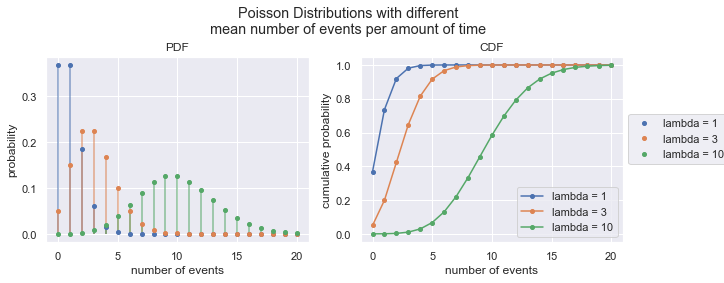

In [114]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for i, rate in enumerate([1, 3, 10]):

    x = np.linspace(0, 20, 21)
    base_line, = ax1.plot(x - 0.0*i, stats.poisson.pmf(x, rate), 'o', ms=4)
    _ = ax1.vlines(x - 0.0*i, 0, stats.poisson.pmf(x, rate), lw=2, color=base_line.get_color(),)
    _ = ax2.plot(x, stats.poisson.cdf(x, rate), marker='o', ms=4)

# Make a legend and show the plot
_ = plt.legend(('lambda = 1', 'lambda = 3', 'lambda = 10'), loc='lower right')

# labels
_ = ax1.set_xlabel('number of events')
_ = ax1.set_ylabel('probability')
_ = ax2.set_xlabel('number of events')
_ = ax2.set_ylabel('cumulative probability')

# titles
_ = ax1.set_title('PDF')
_ = ax2.set_title('CDF')

fig.suptitle('Poisson Distributions with different\nmean number of events per amount of time')

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
_ = fig.legend(('lambda = 1', 'lambda = 3', 'lambda = 10'), loc='right', bbox_to_anchor=(1.02, 0.5))


___

# EXPONENTIAL DISTRIBUTION

The number of random events per unit of time can be described by a Poisson distribution with parameter $\lambda$. The amount of time between random events of a Poisson process follow an Exponential distribution. It has one parameter: the mean waiting time $1 / \lambda$.


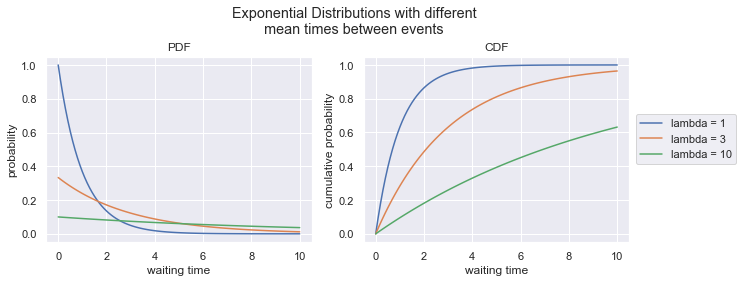

In [98]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for rate in [1, 3, 10]:

    x = np.linspace(0, 10, 101)
    _ = ax1.plot(x, stats.expon.pdf(x, scale=rate))
    _ = ax2.plot(x, stats.expon.cdf(x, scale=rate))

# labels
_ = ax1.set_xlabel('waiting time')
_ = ax1.set_ylabel('probability')
_ = ax2.set_xlabel('waiting time')
_ = ax2.set_ylabel('cumulative probability')

# titles
_ = ax1.set_title('PDF')
_ = ax2.set_title('CDF')

fig.suptitle('Exponential Distributions with different\nmean times between events')

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
_ = fig.legend(('lambda = 1', 'lambda = 3', 'lambda = 10'), loc='right', bbox_to_anchor=(1.03, 0.5))


___

# UNIFORM DISTRIBUTION

Probabilities are **evenly distributed** across the sample space, ie each value has the same probability of occuring (example: roll of a fair dice).


___

# APPENDIX - MATHEMATICAL FORMULA
## Summary

| Distribution | PMF/PDF | ---Mean--- | ---Variance--- |
|--------------|---------|------------|----------------|
| [Normal](https://en.wikipedia.org/wiki/Normal_distribution)           | $$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$ | $$\mu$$               | $$\sigma^2$$            |
| [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution)       | $$f(k \mid n, p) = \binom{n}{k}p^k(1 - p)^{n-k}$$           | $$np$$        | $$np (1 - p)$$  |
| [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution)         | $$f(k \mid \lambda) = \frac{e^{-\lambda}\lambda^{k}}{k!}$$  | $$\lambda$$   | $$\lambda$$     |
| [Exponential](https://en.wikipedia.org/wiki/Exponential_distribution) | $$f(x \mid \lambda) = \lambda e^{-\lambda x}$$              | $$1/\lambda$$ | $$1/\lambda^2$$ |


## Normal Distribution
_[wikipedia article](https://en.wikipedia.org/wiki/Normal_distribution)_

The probability density function of a Normal distribution of mean $\mu$ and variance $\sigma^2$ is equal to:
$$PDF(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

For the standard normal distribution ($\mu=0$, $\sigma^2=1$):
+ the factor $1/\sqrt{2\pi}$ ensures the area under the curve is equal to one.
+ the factor $1/2$ in the exponent ensures the variance is equal to one.

For the general form, the PDF needs to be further scaled by $1/\sigma$ so the integral is still equal to one.


In [ ]:
# probability of having the value of a standard normal distribution below z
print('{:.1%}'.format(stats.norm.cdf(x=0.7)))

# z-score of a given probability
print('{:.3}'.format(stats.norm.ppf(q=0.95)))

# percentile of a student for a normal distribution of mean 75 and sd 7
print('{:.1%}'.format(stats.norm.cdf(x=87, loc=75, scale=7)))


## Binomial Distribution

_[wikipedia article](https://en.wikipedia.org/wiki/Binomial_distribution)_

When calculating the probability of having exactly $k$ successes, we are not interested in the order in which the successes occur. For a given combination (i.e. for a specific order in which the successes occur), the probability of having $k$ successes is:

$$Prob (k) = p^k * (1 - p)^{(n-k)}$$

Accounting for all the combinations of $k$ successes out of $n$ experiments, it follows that the binomial probability is equal to:

$$PMF (k; n, p) = {}_{n}C_k * Prob (k) = \frac{n!}{k!(n-k)!} * p^k * (1 - p)^{(n-k)}$$

The highest probability is for $k = n p$.

*Note: ${}_{n}C_k$ is the binomial coefficient, hence the name of the distribution.*


In [ ]:
# example: probability of rolling a five three times out of 16 dice rolls
print('{:.1%}'.format(stats.binom.pmf(k=3, n=16, p=1/6)))


## Poisson Distribution

The probability of observing $k$ events in an interval is given by the PMF of the Poisson Distribution. The highest probability of the Poisson Distribution is for $k = \lambda$.

$$P(k \text{ events in interval}) = \frac{\lambda^k e^{-\lambda}}{k!}$$


In [ ]:
# example: average deliveries of 8 products per hour

# probability of having only four deliveries between 4PM and 5PM this friday
print('Probability of exactly four deliveries between 4PM and 5PM:  {:.1%}'.format(stats.poisson.pmf(k=4, mu=8)))

# probability of having four deliveries or less between 4PM and 5PM this friday
print('Probability of four deliveries or less between 4PM and 5PM: {:.1%}'.format(stats.poisson.cdf(k=4, mu=8)))

# probability of having zero deliveries between 4:00PM and 4:05PM this friday
print('Probability of zero deliveries between 4:00PM and 4:05PM:   {:.1%}'.format(stats.poisson.pmf(k=0, mu=8/(60/5))))


___

# APPENDIX - APPROXIMATE DISTRIBUTIONS
## Poisson vs Binomial

The Poisson distribution is a limit of the Binomial distribution for rare events: low probability of success and large number of trials. Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two.


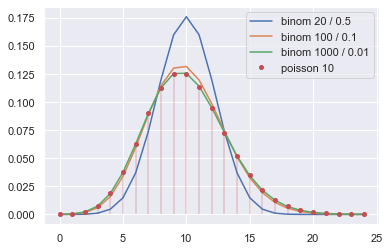

In [79]:
# Poisson vs Binomial distributions
# same mean if np = lambda
# same standard deviation when n >> p
x = range(0, 25)

_ = plt.plot(x, stats.binom.pmf(x, 20, 0.5), label='binom 20 / 0.5')
_ = plt.plot(x, stats.binom.pmf(x, 100, 0.1), label='binom 100 / 0.1')
_ = plt.plot(x, stats.binom.pmf(x, 1000, 0.01), label='binom 1000 / 0.01')
_ = plt.plot(x, stats.poisson.pmf(x, 10), 'ro', ms=4, label='poisson 10')
_ = plt.vlines(x, 0, stats.poisson.pmf(x, 10), colors='r', lw=2, alpha=0.2)

_ = plt.legend(loc='top right')


In [83]:
# Proba of having at most one success: Poisson vs Binomial
print('Poisson vs Binomial')
print('Poisson (l=10):         {:0.3}'.format(stats.poisson.cdf(5, 10)))
print('Binom (n=20, p=0.5):    {:0.3}'.format(stats.binom.cdf(5, 20, 0.5)))
print('Binom (n=100, p=0.1):   {:0.3}'.format(stats.binom.cdf(5, 100, 0.1)))
print('Binom (n=1000, p=0.01): {:0.3}'.format(stats.binom.cdf(5, 1000, 0.01)))


Poisson vs Binomial
Poisson (l=10):         0.0671
Binom (n=20, p=0.5):    0.0207
Binom (n=100, p=0.1):   0.0576
Binom (n=1000, p=0.01): 0.0661


## Binomial vs Normal distribution

The Binomial distribution is not symmetric, but can be approximated by a Normal distribution of same mean and variance if $n$ is not too small and $p$ not too close to either 0 or 1 (the approximation is fairly accurate when both $n *p$ and $n * (1-p)$ are both ≥ 5).


In [84]:
def binom_vs_normal(n, p, ax):
    """
    plot the pmf of a binomial distrib for n experiments with proba of success p
    vs the pdf of the normal distrib of same mean and variance.
    """

    mu = n * p
    sd = np.sqrt(n*p*(1-p))
    xmin = max(0, np.floor(mu - 4 * sd).astype(int))
    xmax = np.ceil(mu + 4 * sd).astype(int)
    x_disc = range(xmin, xmax)
    x_cont = np.linspace(xmin, xmax, 50)
    
    _ = ax.plot(x_disc, stats.binom.pmf(x_disc, n, p), 'bo', ms=4)
    _ = ax.vlines(x_disc, 0, stats.binom.pmf(x_disc, n, p), colors='b', lw=1)
    _ = ax.plot(x_cont, stats.norm.pdf(x_cont, mu, sd), color='red')
    _ = ax.set_xticks(x_disc)

    _ = ax.set_title('n = {}, p = {}, approx: {}'.format(n, p, 'good' if n*p >= 5 and n*(1-p) >= 5 else 'weak'))


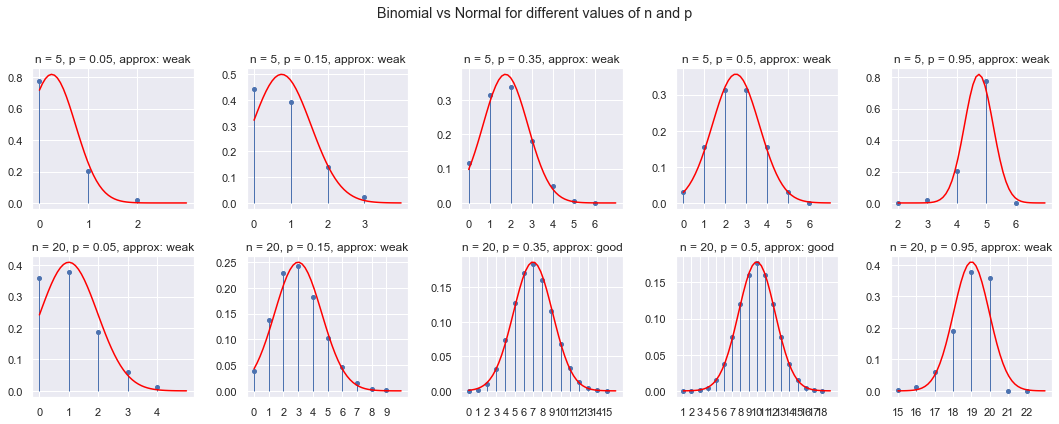

In [85]:
# Plot the PMF and PDF
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (5 * 3, 2 * 3))

binom_vs_normal(5, 0.05, ax[0, 0])
binom_vs_normal(5, 0.15, ax[0, 1])
binom_vs_normal(5, 0.35, ax[0, 2])
binom_vs_normal(5, 0.50, ax[0, 3])
binom_vs_normal(5, 0.95, ax[0, 4])

binom_vs_normal(20, 0.05, ax[1, 0])
binom_vs_normal(20, 0.15, ax[1, 1])
binom_vs_normal(20, 0.35, ax[1, 2])
binom_vs_normal(20, 0.50, ax[1, 3])
binom_vs_normal(20, 0.95, ax[1, 4])

fig.suptitle('Binomial vs Normal for different values of n and p')
fig.tight_layout(rect=[0, 0, 1, 0.9])


## Poisson vs Normal distribution

The Poisson distribution can an be approximated by a Normal distribution of same mean and variance if $\lambda$ is large (the approximation is fairly accurate when $\lambda$ is greater than 10, except deep in the tails).


In [86]:
def poisson_vs_normal(l, ax):
    """
    plot the pmf of a poisson distrib for n experiments with proba of success p
    vs the pdf of the normal distrib of same mean and variance.
    """

    mu = l
    
    sd = np.sqrt(l)
    xmin = max(0, np.floor(mu - 4 * sd).astype(int))
    xmax = np.ceil(mu + 4 * sd).astype(int)
    x_disc = range(xmin, xmax)
    x_cont = np.linspace(xmin, xmax, 50)
    
    _ = ax.plot(x_disc, stats.poisson.pmf(x_disc, l), 'bo', ms=4)
    _ = ax.vlines(x_disc, 0, stats.poisson.pmf(x_disc, l), colors='b', lw=1)
    _ = ax.plot(x_cont, stats.norm.pdf(x_cont, mu, sd), color='red')
    _ = ax.set_xticks(x_disc)

    _ = ax.set_title('lambda = {}'.format(l))


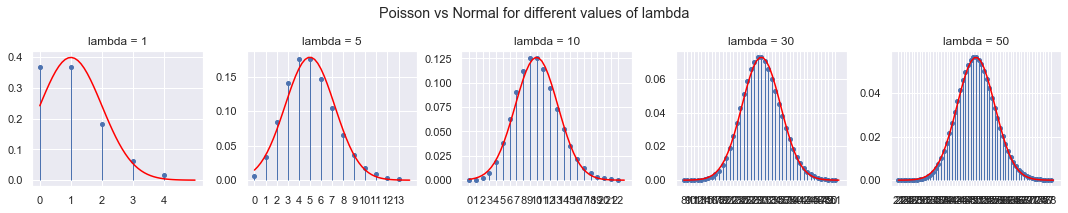

In [87]:
# Plot the PMF and PDF
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (5 * 3, 1 * 3))

poisson_vs_normal(1, ax[0])
poisson_vs_normal(5, ax[1])
poisson_vs_normal(10, ax[2])
poisson_vs_normal(30, ax[3])
poisson_vs_normal(50, ax[4])

fig.suptitle('Poisson vs Normal for different values of lambda')
fig.tight_layout(rect=[0, 0, 1, 0.9])


## Continuity Correction

Approximating a discrete distribution by a continuous distribution requires an adjustment called a continuity correction. When you use a Normal distribution to approximate a Binomial or Poisson distribution, it’s as simple as adding or subtracting 0.5 to the discrete x-value:

| Discrete | Continuous               |
|----------|--------------------------|
| P(X = n) | P(n – 0.5 < X < n + 0.5) |
| P(X > n) | P(X > n + 0.5)           |
| P(X ≥ n) | P(X > n – 0.5)           |
| P(X < n) | P(X < n – 0.5)           |
| P(X ≤ n) | P(X < n + 0.5)           |


In [100]:
# Proba of having at most one success: Poisson vs Normal
print('Binomial vs Normal')
print('l=5,  x=5:  {:0.3} vs {:0.3}'.format(stats.binom.cdf(5, 5, 0.5), stats.norm.cdf(5.5, 5, np.sqrt(5))))
print('l=25, x=25: {:0.3} vs {:0.3}'.format(stats.binom.cdf(25, 25, 0.5), stats.norm.cdf(25.5, 25, np.sqrt(25))))
print('l=50, x=50: {:0.3} vs {:0.3}'.format(stats.binom.cdf(50, 50, 0.5), stats.norm.cdf(50.5, 50, np.sqrt(50))))


Binomial vs Normal
l=5,  x=5:  1.0 vs 0.588
l=25, x=25: 1.0 vs 0.54
l=50, x=50: 1.0 vs 0.528


In [88]:
# Proba of having at most one success: Poisson vs Normal
print('Poisson vs Normal')
print('l=5,  x=5:  {:0.3} vs {:0.3}'.format(stats.poisson.cdf(5, 5), stats.norm.cdf(5.5, 5, np.sqrt(5))))
print('l=25, x=25: {:0.3} vs {:0.3}'.format(stats.poisson.cdf(25, 25), stats.norm.cdf(25.5, 25, np.sqrt(25))))
print('l=50, x=50: {:0.3} vs {:0.3}'.format(stats.poisson.cdf(50, 50), stats.norm.cdf(50.5, 50, np.sqrt(50))))


Poisson vs Normal
l=5,  x=5:  0.616 vs 0.588
l=25, x=25: 0.553 vs 0.54
l=50, x=50: 0.538 vs 0.528
